# Finding the Factors that affect Sale Price of a house

# Advanced Regression

## Part I - Data Cleaning

In this part we will do the following steps:
- Import required packages
- Import data
- Dropping columns with lot of null values and taking care of NAs
- Dropping columns which have very low variance in them. Such columns do not add much value to the model
- Creating dummy variables

In [123]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn import metrics

### Importing the dataset

In [124]:
#Importing data
data = pd.read_csv(r'C:\Users\Shravan\Desktop\Data\Advanced Regression Assignment\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [125]:
#Shape of the dataset
print('Shape of the data is:', data.shape)

Shape of the data is: (1460, 81)


### Checking for number of Null values in each column

In [126]:
#Finding number of nulls in each column
DfCols = (data.shape)[1]
for i in range(0,DfCols):
    nulls = data.iloc[:,i].isna().sum()
    if nulls >0:
        print(i, nulls)

3 259
6 1369
25 8
26 8
30 37
31 37
32 38
33 37
35 38
42 1
57 690
58 81
59 81
60 81
63 81
64 81
72 1453
73 1179
74 1406


- The above columns have null values in them. We can remove columns where 50% or more values are NAs

### Dropping columns with lot of Null values

In [127]:
#Dropping columns with close to 50% null values
drop_cols = [6,57,72,73,74]
data_wona = data.drop(data.columns[drop_cols],axis=1)

#Let us check the how the shape of the dataframe has changed
print('Shape of the updated Dataframe without na is:', data_wona.shape)

#Also, let us check if the columns were removed correctly or not
DfCols_wona = (data_wona.shape)[1]
for i in range(0,DfCols_wona):
    nulls = data_wona.iloc[:,i].isna().sum()
    if nulls >0:
        print(i, nulls)

Shape of the updated Dataframe without na is: (1460, 76)
3 259
24 8
25 8
29 37
30 37
31 38
32 37
34 38
41 1
56 81
57 81
58 81
61 81
62 81


- Columns with lot of NAs have been taken care of
- Before we replace the null values in the above columns, let us look at the categorical vs numeric columns and let us take a look at how those values are populated

### Looking at the frequency of values in each column and removing columns with lot of repeated values

In [128]:
#Looking at values populated in categorical columns
cols = list(data_wona.columns)
for i in range(0, len(cols)):
    print(cols[i], ((data_wona[cols[i]].value_counts())*100/data_wona.shape[0]))

Id 1460    0.068493
479     0.068493
481     0.068493
482     0.068493
483     0.068493
484     0.068493
485     0.068493
486     0.068493
487     0.068493
488     0.068493
489     0.068493
490     0.068493
491     0.068493
492     0.068493
493     0.068493
494     0.068493
495     0.068493
496     0.068493
497     0.068493
498     0.068493
499     0.068493
480     0.068493
478     0.068493
501     0.068493
477     0.068493
458     0.068493
459     0.068493
460     0.068493
461     0.068493
462     0.068493
          ...   
996     0.068493
997     0.068493
998     0.068493
999     0.068493
1000    0.068493
1001    0.068493
1002    0.068493
983     0.068493
982     0.068493
981     0.068493
970     0.068493
962     0.068493
963     0.068493
964     0.068493
965     0.068493
966     0.068493
967     0.068493
968     0.068493
969     0.068493
971     0.068493
980     0.068493
972     0.068493
973     0.068493
974     0.068493
975     0.068493
976     0.068493
977     0.068493
978     0.0

- In the above results we see that there are a lot of columns where the frequency of the values is very high for one particular category. These columns have very low variance and will not help us in building a model which needs to generalize over new data. So, we can drop these columns

In [129]:
#Dropping all the columns with lot of repeated values
drop_list = ['Id','MSZoning','Street','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond',
             'BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive',
            'SaleType','SaleCondition', 'RoofStyle', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal']

data_wva = data_wona.drop(drop_list,axis=1)

#Finding the shape of the updated dataframe
data_wva.shape

(1460, 45)

### Replacing Null Values

In [130]:
DfCols_wva = (data_wva.shape)[1]
for i in range(0,DfCols_wva):
    nulls = data_wva.iloc[:,i].isna().sum()
    if nulls >0:
        print(data_wva.columns[i], nulls)

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtExposure 38
BsmtFinType1 37
GarageType 81
GarageYrBlt 81
GarageFinish 81


In [131]:
#Repalce NAs in the below columns using Median values as they are numeric columns
data_wva['LotFrontage'].fillna(data_wva['LotFrontage'].median(),inplace=True)
data_wva['GarageYrBlt'].fillna(data_wva['GarageYrBlt'].median(),inplace=True)
data_wva['MasVnrArea'].fillna(data_wva['MasVnrArea'].median(),inplace=True)

#Repalce NAs in the below columns using Mode values as they are categorical columns
data_wva['MasVnrType'].fillna('None',inplace=True)

#Repalce NAs in the below columns using the values mentioned in the dtaa dictionary
data_wva['BsmtQual'].fillna('NoBsmtQual',inplace=True)
data_wva['BsmtExposure'].fillna('NoBsmtExposure',inplace=True)
data_wva['BsmtFinType1'].fillna('NoBsmtFinType1',inplace=True)
data_wva['GarageType'].fillna('NoGarageType',inplace=True)
data_wva['GarageFinish'].fillna('NoGarageFinish',inplace=True)

In [132]:
#Finding the shape of the dataframe and verifying if there are anymore nulls
print(data_wva.shape)

DfCols_wva = (data_wva.shape)[1]
for i in range(0,DfCols_wva):
    nulls = data_wva.iloc[:,i].isna().sum()
    if nulls >0:
        print(data_wva.columns[i], nulls)

(1460, 45)


### Converting the 'year' column to 'number of years from current year'

In [133]:
#Changing the year column to the number of years it has been since construction etc.
import datetime
now = datetime.datetime.now()
curr_year = now.year

data_wva['YearBuilt'] = curr_year - data_wva['YearBuilt']
data_wva['YearRemodAdd'] = curr_year - data_wva['YearRemodAdd']
data_wva['GarageYrBlt'] = curr_year - data_wva['GarageYrBlt']
data_wva['YrSold'] = curr_year - data_wva['YrSold']

In [134]:
data_wva.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

### Checking for duplicate rows in the dataset

In [135]:
print(data_wva.duplicated().value_counts())

False    1460
dtype: int64


- There are no duplicate rows as well in the dataframe

### Creating Dummy Variables

In [136]:
dummy_list = ['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'Exterior1st',
              'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
              'FullBath', 'GarageType', 'GarageFinish', 'KitchenQual']
for i in range(0,len(dummy_list)):
    x = pd.get_dummies(data_wva[dummy_list[i]], prefix = dummy_list[i], prefix_sep = '_', drop_first = True)
    data_wva = pd.concat([data_wva,x],axis=1)
data_final = data_wva.drop(dummy_list, axis=1)

In [137]:
data_final.shape

(1460, 167)

## Part II - Model Building

In this part we will do the following steps:
- MinMax Scaling of the data
- Use RFE for vriable selection
- Build Linear Regression Model
- Build Lassso and Ridge Regression
- For Ridge and Lasso, check for the optimum Lambda value
- For the above models calculate train and test accuracies
- Decide which is the best model and provide with co-efficients

### MinMax Scaling

In [138]:
#Standardising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colum = data_final.columns
data_final[colum] = scaler.fit_transform(data_final[colum])

C:\Users\Shravan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [139]:
data_final.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarageType,GarageFinish_NoGarageFinish,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,0.150685,0.033420,0.050725,0.116667,0.12250,0.125089,0.064212,0.140098,0.119780,0.413559,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.202055,0.038795,0.246377,0.566667,0.00000,0.173281,0.121575,0.206547,0.212942,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.160959,0.046507,0.065217,0.133333,0.10125,0.086109,0.185788,0.150573,0.134465,0.419370,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.133562,0.038561,0.688406,0.666667,0.00000,0.038271,0.231164,0.123732,0.143873,0.366102,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.215753,0.060576,0.072464,0.166667,0.21875,0.116052,0.209760,0.187398,0.186095,0.509927,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train - Test Split

In [140]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [141]:
#Creating a separate dataframe for the dependent variable
y_train = df_train.pop('SalePrice')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

(1021,)
(1021, 166)


In [142]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### RFE

In [143]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#RFE taking 20 variables as variable count
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [144]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 6),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 73),
 ('MasVnrArea', False, 59),
 ('BsmtFinSF1', False, 49),
 ('BsmtUnfSF', False, 77),
 ('TotalBsmtSF', False, 145),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 146),
 ('BsmtFullBath', False, 2),
 ('HalfBath', False, 85),
 ('BedroomAbvGr', False, 122),
 ('TotRmsAbvGrd', False, 62),
 ('Fireplaces', False, 43),
 ('GarageYrBlt', False, 97),
 ('GarageCars', True, 1),
 ('GarageArea', False, 117),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 84),
 ('3SsnPorch', True, 1),
 ('MoSold', False, 135),
 ('YrSold', False, 111),
 ('MSSubClass_30', False, 82),
 ('MSSubClass_40', False, 143),
 ('MSSubClass_45', False, 68),
 ('MSSubClass_50', False, 132),
 ('MSSubClass_60', False, 140),
 ('MSSubClass_70', False, 134),
 ('MSSubClass_75', False, 39),
 ('MSSubClass_80', False, 124),
 ('MSSubClass_85', False, 88),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 23),


In [145]:
FinalCols = X_train.columns[rfe.support_]
FinalCols

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'GarageCars',
       '3SsnPorch', 'MSSubClass_90', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'Exterior1st_ImStucc', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_NoBsmtQual', 'BsmtQual_TA', 'BsmtFinType1_NoBsmtFinType1',
       'FullBath_3'],
      dtype='object')

In [146]:
X_train_rfe = X_train[FinalCols]
X_test_rfe = X_test[FinalCols]

## Linear Regression

In [147]:
# linear regression
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
print(lm.coef_)

[ 0.22300931 -0.09746425  0.35655991  0.11774559  0.07483528  0.04473143
 -0.03986118 -0.06551128  0.05495192  0.06583619  0.05289579  0.12092622
  0.12250531 -0.05313294 -0.06273491 -0.04734508 -0.04664543 -0.06023942
 -0.04664543  0.05974436]


In [148]:
#Finding Accuracy
y_train_pred = lm.predict(X_train_rfe)
print('Accuracy on train dataset is: ', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test_rfe)
print('Accuracy on test dataset is: ', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Accuracy on train dataset is:  0.8304990104412717
Accuracy on test dataset is:  0.8235642143600975


- Here we see that the accuracy on train dataset is 83.04 and on test it is 82.3. These are reasonably good accuracies, however let us try building regualrized models and check how their accuracies look and then decide on the final model to be used

## Ridge and Lasso Regression 

### Ridge Regression Model

In [149]:
#Building the model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# list of alphas to tune
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge_worfe = Ridge()

folds = 5
model_ridge_worfe = GridSearchCV(estimator = ridge_worfe, 
                        param_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge_worfe.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [150]:
cv_results_worfe = pd.DataFrame(model_ridge_worfe.cv_results_)
cv_results_worfe = cv_results_worfe[cv_results_worfe['param_alpha']<=50]
cv_results_worfe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007918,0.003018,0.002663,0.001816,0.0001,{'alpha': 0.0001},-0.028061,-0.027876,-0.030588,-0.027756,...,-0.028812,0.001153,24,-0.022996,-0.018651,-0.021179,-0.022805,-0.022484,-0.021623,0.001616
1,0.011551,0.003314,0.001388,0.001496,0.001,{'alpha': 0.001},-0.028055,-0.027868,-0.030569,-0.027748,...,-0.028801,0.001149,23,-0.022994,-0.018650,-0.021177,-0.022803,-0.022483,-0.021621,0.001616
2,0.011819,0.007716,0.001427,0.001769,0.01,{'alpha': 0.01},-0.028006,-0.027821,-0.030430,-0.027687,...,-0.028724,0.001116,22,-0.022976,-0.018646,-0.021169,-0.022789,-0.022481,-0.021612,0.001612
3,0.009393,0.002035,0.000803,0.001172,0.05,{'alpha': 0.05},-0.027813,-0.027695,-0.030175,-0.027518,...,-0.028531,0.001077,21,-0.022936,-0.018668,-0.021140,-0.022759,-0.022490,-0.021599,0.001596
4,0.009782,0.002720,0.001241,0.001454,0.1,{'alpha': 0.1},-0.027601,-0.027593,-0.030003,-0.027358,...,-0.028366,0.001069,20,-0.022899,-0.018714,-0.021116,-0.022746,-0.022496,-0.021594,0.001573


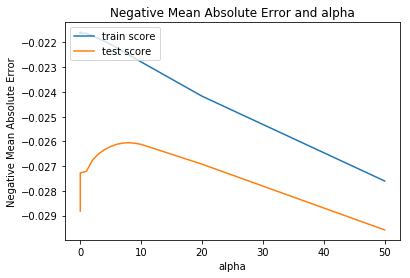

In [151]:
cv_results_worfe['param_alpha'] = cv_results_worfe['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_worfe['param_alpha'], cv_results_worfe['mean_train_score'])
plt.plot(cv_results_worfe['param_alpha'], cv_results_worfe['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- Here we see that at alpha between 0.5-8 is giving us good accuracy. So, let us build a model using alpha =0.5 to 8 and get the accuracies

### Ridge Regression using Alpha = 0.5

In [152]:
#Let us iterate the model for alpha = 0.5
alpha = 0.5
ridge_alpha05 = Ridge(alpha=alpha)

ridge_alpha05.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [153]:
#Let us now check for accuracies with alpha=0.5
y_train_pred = ridge_alpha05.predict(X_train)
print('Train Accuracy score for Alpha = 0.5: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha05.predict(X_test)
print('Test Accuracy score for Alpha = 0.5: ', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 0.5:  0.8950890778121006
Test Accuracy score for Alpha = 0.5:  0.8621794632356515


### Ridge Regression using Alpha = 1

In [154]:
#Let us iterate the model for alpha = 1
alpha = 1
ridge_alpha1 = Ridge(alpha=alpha)

ridge_alpha1.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
#Let us now check for accuracies with alpha=1
y_train_pred = ridge_alpha1.predict(X_train)
print('Train Accuracy score for Alpha = 1: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha1.predict(X_test)
print('Test Accuracy score for Alpha = 1: ', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 1:  0.8938134141094161
Test Accuracy score for Alpha = 1:  0.8635653195756742


### Ridge Regression using Alpha = 2

In [156]:
#Let us iterate the model for alpha = 2
alpha = 2
ridge_alpha2 = Ridge(alpha=alpha)

ridge_alpha2.fit(X_train, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [157]:
#Let us now check for accuracies with alpha=2
y_train_pred = ridge_alpha2.predict(X_train)
print('Train Accuracy score for Alpha = 2: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha2.predict(X_test)
print('Test Accuracy score for Alpha = 2: ', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 2:  0.8914958944164196
Test Accuracy score for Alpha = 2:  0.864575548850414


### Ridge Regression using Alpha = 3

In [158]:
#Let us iterate the model for alpha = 3
alpha = 3
ridge_alpha3 = Ridge(alpha=alpha)

ridge_alpha3.fit(X_train, y_train)

Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [159]:
#Let us now check for accuracies with alpha=3
y_train_pred = ridge_alpha3.predict(X_train)
print('Train Accuracy score for Alpha = 3: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha3.predict(X_test)
print('Test Accuracy score for Alpha = 3: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 3:  0.8894719579293141
Test Accuracy score for Alpha = 3:  0.8645739357955933


### Ridge Regression using Alpha = 4

In [160]:
#Let us iterate the model for alpha = 4
alpha = 4
ridge_alpha4 = Ridge(alpha=alpha)

ridge_alpha4.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [161]:
#Let us now check for accuracies with alpha=4
y_train_pred = ridge_alpha4.predict(X_train)
print('Train Accuracy score for Alpha = 4: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha4.predict(X_test)
print('Test Accuracy score for Alpha = 4: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 4:  0.887638487435803
Test Accuracy score for Alpha = 4:  0.8640896930615695


### Ridge Regression using Alpha = 5

In [162]:
#Let us iterate the model for alpha =5
alpha = 5
ridge_alpha5 = Ridge(alpha=alpha)

ridge_alpha5.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [163]:
#Let us now check for accuracies with alpha=5
y_train_pred = ridge_alpha5.predict(X_train)
print('Train Accuracy score for Alpha = 5: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha5.predict(X_test)
print('Test Accuracy score for Alpha = 5: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 5:  0.8859282983009393
Test Accuracy score for Alpha = 5:  0.8633292474081904


### Ridge Regression using Alpha = 6

In [164]:
#Let us iterate the model for alpha = 6
alpha = 6
ridge_alpha6 = Ridge(alpha=alpha)

ridge_alpha6.fit(X_train, y_train)

Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
#Let us now check for accuracies with alpha=6
y_train_pred = ridge_alpha6.predict(X_train)
print('Train Accuracy score for Alpha = 6: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha6.predict(X_test)
print('Test Accuracy score for Alpha = 6: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 6:  0.8843021436727712
Test Accuracy score for Alpha = 6:  0.8623948868547966


### Ridge Regression using Alpha = 7

In [166]:
#Let us now iterate the model for alpha = 7
alpha = 7
ridge_alpha7 = Ridge(alpha=alpha)

ridge_alpha7.fit(X_train, y_train)

Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [167]:
#Let us now check for accuracies with alpha=7
y_train_pred = ridge_alpha7.predict(X_train)
print('Train Accuracy score for Alpha = 7: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha7.predict(X_test)
print('Test Accuracy score for Alpha = 7: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 7:  0.8827363846466846
Test Accuracy score for Alpha = 7:  0.8613445764911596


### Ridge Regression using Alpha = 8

In [168]:
#Let us now iterate the model for alpha = 8
alpha = 8
ridge_alpha8 = Ridge(alpha=alpha)

ridge_alpha8.fit(X_train, y_train)

Ridge(alpha=8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [169]:
#Let us now check for accuracies with alpha=8
y_train_pred = ridge_alpha8.predict(X_train)
print('Train Accuracy score for Alpha = 8: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_alpha8.predict(X_test)
print('Test Accuracy score for Alpha = 8: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Alpha = 8:  0.8812161171654465
Test Accuracy score for Alpha = 8:  0.8602140889733109


- From the above iterations, we see that at alpha value 2, we get highest accuracy. If we reduce alpha below 2 we are getting good train accuracy but not good test accuracy. So, we will consider the model built with alpha = 2

### Lasso Regression Model

In [170]:
from sklearn.linear_model import Lasso
lasso_worfe = Lasso()

# cross validation
model_lasso_worfe = GridSearchCV(estimator = lasso_worfe, 
                        param_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_worfe.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [171]:
lasso_results_worfe = pd.DataFrame(model_lasso_worfe.cv_results_)
lasso_results_worfe = lasso_results_worfe[lasso_results_worfe['param_alpha']<=1]
lasso_results_worfe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.066026,0.033052,0.001472,0.001537,0.0001,{'alpha': 0.0001},-0.023787,-0.025893,-0.028749,-0.024238,...,-0.025794,0.001759,1,-0.022720,-0.019142,-0.020818,-0.022547,-0.022554,-0.021556,0.001393
1,0.018748,0.006254,0.000000,0.000000,0.001,{'alpha': 0.001},-0.026885,-0.033422,-0.031197,-0.028990,...,-0.030625,0.002406,2,-0.029519,-0.027715,-0.028055,-0.029067,-0.029023,-0.028676,0.000677
2,0.009584,0.007410,0.000000,0.000000,0.01,{'alpha': 0.01},-0.052840,-0.059862,-0.056883,-0.050444,...,-0.055904,0.003709,3,-0.056254,-0.053505,-0.055011,-0.055854,-0.055231,-0.055171,0.000943
3,0.009372,0.007653,0.000000,0.000000,0.05,{'alpha': 0.05},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890
4,0.006249,0.007653,0.003124,0.006248,0.1,{'alpha': 0.1},-0.080163,-0.083497,-0.077215,-0.075374,...,-0.079964,0.003289,4,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890


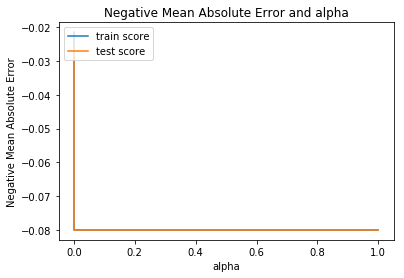

In [172]:
lasso_results_worfe['param_alpha'] = lasso_results_worfe['param_alpha'].astype('int32')

# plotting
plt.plot(lasso_results_worfe['param_alpha'], lasso_results_worfe['mean_train_score'])
plt.plot(lasso_results_worfe['param_alpha'], lasso_results_worfe['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- Here we see that for alpha=0, we are getting good train and test accuracies. So, we will go ahead with alpha = 0 and build a model

In [173]:
#Finding accruacies for Alpha = 0 in Lasso
alpha = 0
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
lasso.coef_

C:\Users\Shravan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Shravan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Shravan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([-7.79430642e-02,  1.35339173e-01, -3.19315159e-02, -8.73725555e-03,
        1.70289504e-02, -4.62065283e-02, -3.22972677e-04,  3.16461463e-02,
        2.13274295e-01,  1.59070573e-01, -1.09254056e-02,  2.92834017e-02,
        1.27003672e-02,  4.40478350e-03,  1.96887313e-02,  1.85075692e-02,
        6.28695074e-03,  7.27592967e-02, -8.69956609e-03,  1.05462908e-02,
       -1.19015140e-02,  4.34158357e-02, -2.06447650e-03,  4.49113517e-03,
       -4.95427755e-03,  8.65373779e-04, -9.84312256e-03,  1.05082044e-02,
        8.82368584e-04,  5.58606258e-03,  3.98530516e-02,  1.62095853e-04,
       -6.39107422e-03, -2.14522982e-02, -3.49202271e-02, -2.74159266e-02,
       -3.55631644e-02, -9.82659572e-03,  6.32901841e-03, -2.12761599e-02,
        3.56972226e-03,  8.69702515e-03, -2.16676715e-02, -1.95501959e-02,
       -1.77188088e-03, -2.06998458e-02, -7.32029262e-04,  6.62365908e-04,
        1.33221853e-02,  1.08738461e-02,  4.55027109e-02, -2.36377962e-02,
        1.68934664e-02, -

In [174]:
#Let us now check for accuracies with Lasso
y_train_pred = lasso.predict(X_train)
print('Train Accuracy score for Lasso: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print('Test Accuracy score for Lasso: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Accuracy score for Lasso:  0.8962516973923415
Test Accuracy score for Lasso:  0.8573149510991303


### Findings and final model results

- In Lasso, though the accuracy on the train dataset is highest of all the models we built so far, the accuracy on the test dataset is lower than that of Ridge Regression with alpha =2. So, we will go ahead with Ridge Regression with alpha = 2 as our final model

- The Lambda values that we got for Ridge Regression is 2 and for Lasso Regression it is 0

In [175]:
coeff = list(ridge_alpha2.coef_)
coeff

[-0.024137281889069197,
 0.054223443775991774,
 -0.020717229256988358,
 -0.013193019888864852,
 0.02626310344737623,
 0.004766285641413189,
 0.01659235418729097,
 0.027439620986492035,
 0.062243830972463436,
 0.08079699124604342,
 0.07805083399215641,
 0.027512969902252837,
 0.014272093411516782,
 0.012136181182377343,
 0.03394326192089887,
 0.025021738830096917,
 0.005635588497044917,
 0.05241978026996569,
 0.013636122121326987,
 0.01562778309960824,
 -0.005436692961014069,
 0.023892853977244832,
 -0.0008400337721376296,
 0.003972587457514071,
 -0.008701271089508853,
 -0.0026442787290776476,
 -5.49809499699607e-05,
 0.007761130608105714,
 0.00125676576951306,
 0.004701390423304057,
 0.008324734476641305,
 0.0007850020821984619,
 -0.0034324411740139444,
 -0.017961689895767824,
 -0.03178526207970862,
 -0.022364802059184955,
 -0.01737322262660096,
 -0.010595821954071398,
 0.007887402039051,
 -0.017217728565721322,
 0.002483658098914389,
 0.012970929972883526,
 -0.01726267813605186,
 -0.0

In [176]:
train_columns = list(X_train.columns)

In [177]:
#Creating a dataframe of coefficients and columns
dictionary = {'Feature' : train_columns, 'Coeff': coeff}
ridge_coeff = pd.DataFrame(dictionary)
ridge_coeff.sort_values(by = ['Coeff'], ascending = False, inplace=True)
ridge_coeff

,Feature,Coeff
9,2ndFlrSF,0.080797
10,GrLivArea,0.078051
84,OverallQual_10,0.075807
59,Neighborhood_NoRidge,0.068539
83,OverallQual_9,0.065219
153,FullBath_3,0.063907
8,1stFlrSF,0.062244
1,LotArea,0.054223
17,GarageCars,0.052420
60,Neighborhood_NridgHt,0.042786


- The variables with high positive coefficients make sense. Second Floor Area, Above Ground Living Area, Overall Quality =10, Neighborhood is NorthRidge, Number of bathrooms above grade = 3 and so on
- The above listed are the top 5 variables that effect the price of a house positively
- Basement Quality = typical, Basement Quality good, Overall Quality = 2, Basement Quality Fair, 1-Story PUD are the top negative variables which pull down the cost of a house